<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [200]:
student_number = '401105872'
Name = 'Armin'
Last_Name = 'Khosravi'

# Libraries

In [201]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [202]:
def function_y(x):
    return 0.2 * x ** 6 - 0.5 * x ** 5 + 2 * x ** 4 - 5 * x ** 3 + 3 * x ** 2 - 10 * x + 5


def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)

    y = function_y(X)

    noise = np.random.normal(0, noise_std, num_samples)

    y += noise

    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

X shape : (1000,)
y shape : (1000,)


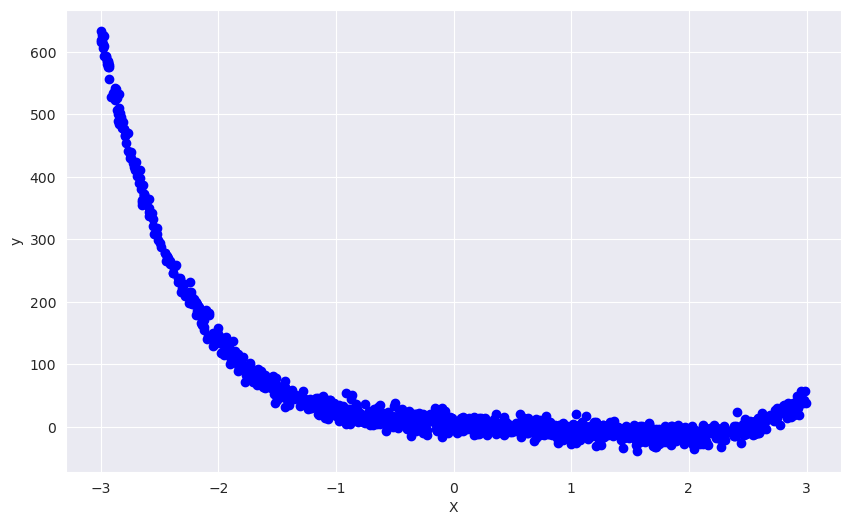

In [203]:
X, y = generate_dataset(-3, 3)

print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

# TODO: Visualize the dataset using scatter


plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue')

plt.xlabel('X')
plt.ylabel('y')

# Show the plot
plt.show()


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [204]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, in_range_X_test, y_train, in_range_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

out_test_start = 5
out_test_end = 7
num_samples = len(in_range_X_test)
out_range_X_test, out_range_y_test = generate_dataset(out_test_start, out_test_end, num_samples)

print(out_range_X_test.shape)
out_range_X_test = out_range_X_test[:, np.newaxis]
X_train = X_train[:, np.newaxis]
in_range_X_test = in_range_X_test[:, np.newaxis]
print(out_range_X_test.shape)

# TODO: Generate the out-of-range testing set


(200,)
(200, 1)


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

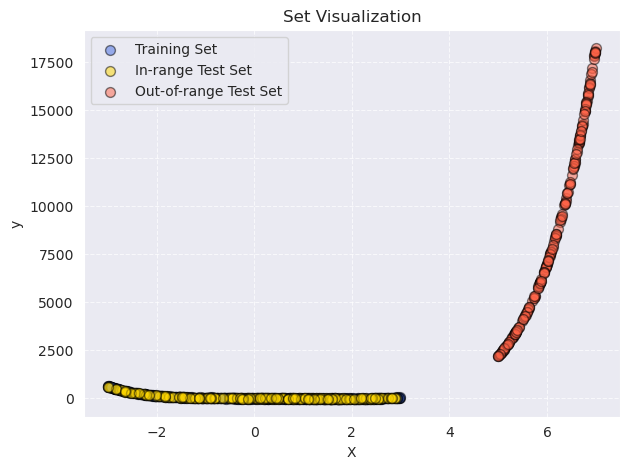

In [205]:
# TODO: Visualize the sets using scatter (or other plots)
# Scatter plots for each dataset
plt.scatter(X_train, y_train, color='royalblue', label='Training Set', alpha=0.5, edgecolor='k', s=50)
plt.scatter(in_range_X_test, in_range_y_test, color='gold', label='In-range Test Set', alpha=0.5, edgecolor='k', s=50)
plt.scatter(out_range_X_test, out_range_y_test, color='tomato', label='Out-of-range Test Set', alpha=0.5, edgecolor='k',
            s=50)

plt.title('Set Visualization')
plt.xlabel('X')
plt.ylabel('y')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [206]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    model.fit(X, y)

    return model

In [207]:
models = {}
degree = 9

for deg in range(2, degree + 1):
    models[deg] = train_models(X_train, y_train, deg)

# TODO: Add the trained models with different degrees to the dict

print(models)

{2: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())]), 3: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())]), 4: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())]), 5: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())]), 6: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())]), 7: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())]), 8: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())]), 9: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
   

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [208]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = []
    for model in models.values():
        # print(model)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        losses.append(mse)

    return losses

In [209]:
# TODO: Evaluate models on both the train and the test sets.
train_losses = evaluate_models(models, X_train, y_train)
in_range_test_losses = evaluate_models(models, in_range_X_test, in_range_y_test)
out_range_test_losses = evaluate_models(models, out_range_X_test, out_range_y_test)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

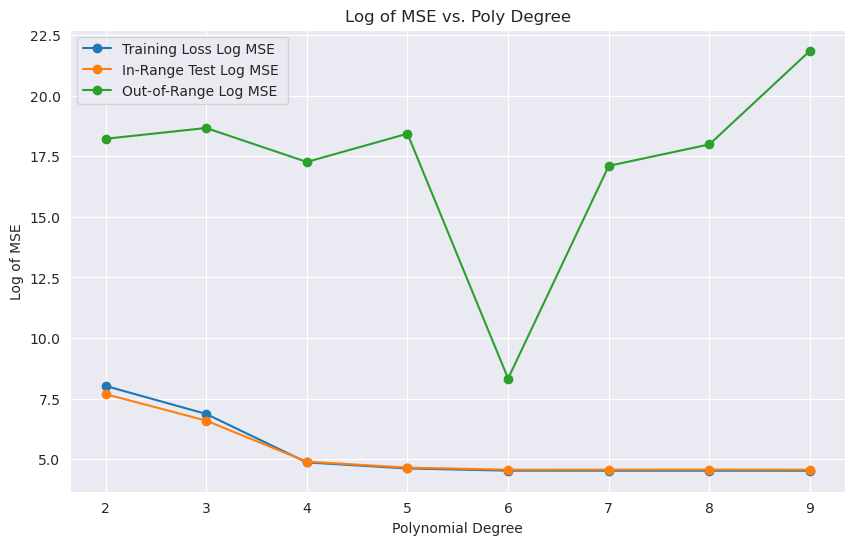

In [210]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9

train_losses_log = np.log(train_losses)
in_range_test_losses_log = np.log(in_range_test_losses)
out_range_test_losses_log = np.log(out_range_test_losses)

# TODO: Plot the log MSE results

degrees = range(2, degree + 1)

plt.figure(figsize=(10, 6))

plt.plot(degrees, train_losses_log, label='Training Loss Log MSE', marker='o')

plt.plot(degrees, in_range_test_losses_log, label='In-Range Test Log MSE ', marker='o')

plt.plot(degrees, out_range_test_losses_log, label='Out-of-Range Log MSE ', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel("Log of MSE")
plt.title("Log of MSE vs. Poly Degree")
plt.legend()
plt.grid(True)
plt.show()



In [211]:
# TODO: Print each model loss on the training and the two test sets


for i, deg in enumerate(degrees):
    print("-" * 50)
    print(f'model degree {degrees[i]} :')
    print(f'train log loss {train_losses_log[i]}')
    print(f'test in range log loss {in_range_test_losses_log[i]}')
    print(f'test out range log loss {out_range_test_losses_log[i]}')

--------------------------------------------------
model degree 2 :
train log loss 8.021711681427174
test in range log loss 7.685325723727356
test out range log loss 18.22385703243895
--------------------------------------------------
model degree 3 :
train log loss 6.865413936883618
test in range log loss 6.589004572277041
test out range log loss 18.668340507797605
--------------------------------------------------
model degree 4 :
train log loss 4.863875301326867
test in range log loss 4.894760183882642
test out range log loss 17.26659396113784
--------------------------------------------------
model degree 5 :
train log loss 4.61536046544648
test in range log loss 4.6486510542365975
test out range log loss 18.433765999813748
--------------------------------------------------
model degree 6 :
train log loss 4.523877847319682
test in range log loss 4.563067602591355
test out range log loss 8.326189822960604
--------------------------------------------------
model degree 7 :
train log 

## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

The bias-variance tradeoff becomes evident when analyzing the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees. As we increase the polynomial degree, the model becomes more complex, which results in higher variance and lower bias.

- **Training set loss:** With higher-degree polynomials, the model fits the training data very well, leading to lower training loss. However, this can lead to overfitting, where the model becomes highly sensitive to the specific patterns and noise in the training set, causing high variance.
  
- **In-range test set loss:** For in-range test data, which is similar to the training set, the model tends to perform well. The model, while more complex, captures the detailed patterns from the training data, resulting in lower test loss for these similar data points. The high variance doesn't affect performance much here because the test data is closely aligned with the training set.

- **Out-of-range test set loss:** However, for out-of-range test data that differs significantly from the training set, the high variance of a complex model leads to poor generalization. The model struggles to perform well on unseen data that doesn't resemble the training set, leading to higher test loss.

This illustrates the tradeoff between model complexity and performance. A complex model (with a high-degree polynomial) has low bias but high variance, performing well on the training set and in-range test data but poorly on out-of-range test data. In contrast, a simpler model with a lower degree may have higher bias but lower variance, making it less prone to overfitting and better at generalizing across different test sets. Finding the right balance between bias and variance is crucial to achieving good performance on both the training and test datasets.


2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** As the degree of the polynomial increases, the model becomes more complex, which raises the risk of overfitting. Overfitting can lead to poor performance on the test dataset, as the gap between the training and test loss widens. Choosing a degree that is neither too high nor too low is ideal, as it helps minimize loss on both the training and test datasets, leading to better overall performance.</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [212]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset

df = pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Get a brief description and do some EDA to get familiar with the dataset

In [213]:
# TODO: you can use .info() and .description()
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# Preprocessing

In [214]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

print(df.isnull().sum())

def preprocess_data(df):

    categorical_col = ['sex', 'smoker', 'region']
    
    # Apply LabelEncoder to each categorical column
    for col in categorical_col:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    
    numerical_col = ['age', 'bmi', 'children']
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(df[numerical_col])
    scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_col)
    
    # processed_df = pd.concat([scaled_numerical_df.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)],
    #                          axis=1)
    processed_df = pd.concat([scaled_numerical_df.reset_index(drop=True),
                              df[categorical_col].reset_index(drop=True)], axis=1)
    return processed_df

processed_df = preprocess_data(df)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [215]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.

X = processed_df
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
X

,age,bmi,children,sex,smoker,region
0,-1.438764,-0.453320,-0.908614,0,1,3
1,-1.509965,0.509621,-0.078767,1,0,2
2,-0.797954,0.383307,1.580926,1,0,2
3,-0.441948,-1.305531,-0.908614,1,0,1
4,-0.513149,-0.292556,-0.908614,1,0,1
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,0,1
1334,-1.509965,0.206139,-0.908614,0,0,0
1335,-1.509965,1.014878,-0.908614,0,0,2
1336,-1.296362,-0.797813,-0.908614,0,0,3


In [217]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [218]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


# Training

Fit a linear regressor to the data.

In [219]:
# TODO: Use sklearn
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

Get the coefficients of the variables and visualize it

In [220]:
# TODO:
coeffs = linear_model.coef_
coeffs

array([ 3.61028043e+03,  2.04689296e+03,  5.12253132e+02, -1.87914567e+01,
        2.36478181e+04, -2.71284266e+02])

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [221]:
# TODO: Use Lasso from sklearn library
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_model.coef_

array([ 3.60981090e+03,  2.04632401e+03,  5.11792306e+02, -1.65594927e+01,
        2.36445256e+04, -2.70790689e+02])

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [222]:
# TODO: Use Ridge from sklearn library
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
ridge_model.coef_

array([ 3551.73175974,  2032.01383589,   517.62875336,    52.69089852,
       22354.60059079,  -270.23239608])

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [223]:
# TODO: Use folding methods and mape from sklearn library
k = 5
kfold = KFold(n_splits=k)
kfold


def get_cv_scores(model, X, y, kfold):
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=kfold)
    cv_mape = -cv_scores.mean()
    return cv_mape


lasso_mape = get_cv_scores(lasso_model, X, y, kfold)
print(lasso_mape)

ridge_mape = get_cv_scores(ridge_model, X, y, kfold)

print(ridge_mape)




0.4256875661516264
0.4431030200066539


In [224]:
def evaluate_models(model, X, y):
    y_hat = model.predict(X)
    return mean_absolute_percentage_error(y, y_hat)



Add extra variables to dataset to make model more complex, then compare the results. 

In [225]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
X_poly_train.shape


(1070, 84)

In [226]:
poly_regression = LinearRegression()
poly_regression.fit(X_poly_train, y_train)

poly_ridge_score = get_cv_scores(poly_regression, X_poly_test, y_test, kfold)
poly_ridge_score

print(evaluate_models(poly_regression, X_poly_train, y_train))
print(evaluate_models(poly_regression, X_poly_test, y_test))

0.29957659827769256
0.35314079682745614


In [227]:
ridge_poly = Ridge(20)
ridge_poly.fit(X_poly_train, y_train)
print(evaluate_models(ridge_poly, X_poly_train, y_train))
print(evaluate_models(ridge_poly, X_poly_test, y_test))

0.31258886638848704
0.3523586669318064


In [228]:
lasso_poly = Lasso(0.5)
lasso_poly.fit(X_poly_train, y_train)
print(evaluate_models(lasso_poly, X_poly_train, y_train))
print(evaluate_models(lasso_poly, X_poly_test, y_test))

0.2968009084593412
0.34417651213376305


/home/armin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.785e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Report your best model with its evaluated results.

In [229]:
# TODO: Print each model's loss on the training and the test set.
# done above 

In [230]:
test_df = pd.read_csv('InsuranceData_test.csv')
test_df

,age,sex,bmi,children,smoker,region
0,42,female,24.763,2,yes,northwest
1,41,male,26.454,3,no,northeast
2,52,male,37.093,0,no,southwest
3,52,female,38.641,1,no,southeast
4,64,female,36.380,0,no,southeast
...,...,...,...,...,...,...
460,56,male,30.304,1,no,southeast
461,18,male,35.205,0,no,northwest
462,37,male,19.814,1,no,northwest
463,26,female,19.550,3,yes,northwest


In [231]:
preprocessed_test_df = preprocess_data(test_df)
preprocessed_test_df

,age,bmi,children,sex,smoker,region
0,0.188230,-0.920704,0.763521,0,1,1
1,0.116369,-0.641734,1.606840,1,0,0
2,0.906843,1.113421,-0.923117,1,0,3
3,0.906843,1.368800,-0.079798,0,0,2
4,1.769179,0.995795,-0.923117,0,0,2
...,...,...,...,...,...,...
460,1.194289,-0.006585,-0.079798,1,0,2
461,-1.536441,0.801951,-0.923117,1,0,1
462,-0.171076,-1.737159,-0.079798,1,0,1
463,-0.961551,-1.780712,1.606840,0,1,1


In [232]:
best_model = Ridge(20)
best_model.fit(X_poly_train,y_train)

preprocessed_test_df_poly = poly_features.fit_transform(preprocessed_test_df)

y_hat = best_model.predict(preprocessed_test_df_poly)
test_df['charges'] = y_hat

In [233]:
test_df.to_csv('./submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




When comparing the weight distribution in L1 and L2 regularization, I observe that in L1 regularization, some weights tend to be very low or even exactly zero. This indicates that the L1 model encourages model to make certain weights to become zero. 

In contrast, with L2 regularization, the weights are more distributed and generally not driven to zero. The model in L2 regularization tends to shrink all weights more evenly, without enforcing sparsity as strongly as L1.



2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- **L1 Regularization**: As I increase alpha, the number of zero or near-zero weights increases. This behavior shows that L1 regularization forces the model to make more weights exactly zero by removing features or not giving them enough weight. In this way, it can improve **model explainability** by highlighting the most important features and removing the less relevant ones.

- **L2 Regularization**: When alpha is increased, the weights generally become smaller, but they don't reach zero. At lower values of alpha, increasing it significantly reduces the weights, but after a certain point, further increases in alpha don't shrink the weights as much. L2 regularization spreads the shrinkage across all features, helping to reduce overfitting, but it doesn't improve explainability in terms of feature selection like L1.


3. How does the regularization affect dimension expansion?

- **L1 Regularization**: As mentioned before, L1 regularization aims to remove some features, reducing the number of features in the model. This can decrease the effects of dimension expansion. In high-dimensional spaces, L1 regularization helps mitigate the curse of dimensionality by selecting only the most relevant features and discarding less important ones.

- **L2 Regularization**: L2 regularization, on the other hand, does not enforce sparsity and does not drive weights to zero. Instead, it uniformly reduces the magnitude of all weights. While this helps control overfitting, it does not reduce the number of features used; in cases where a feature is unrelated, it can still retain non-zero weights, making it less effective against dimension expansion.
